In [1]:
import twitter

In [2]:
CONSUMER_KEY = 'tPle4rosXD4PtqosFsVsM7ntu'
CONSUMER_SECRET = 'qHqBOjvkVFGcugAORCh72JpxmiagCe276hDqeFvKYZuf893b9n'
OAUTH_TOKEN = '1562218964964769793-SrQyuGKpW0lWj1o6FYCl01ZOwbaVmM'
OAUTH_TOKEN_SECRET = 'jzKkecZ1KF0fEEcU3UOIzhuTBsfHRrlO7pjG5Ap3ARvVa'

In [3]:
auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET, CONSUMER_KEY, CONSUMER_SECRET)

In [4]:
twitter_api = twitter.Twitter(auth=auth)

In [5]:
type(twitter_api)

twitter.api.Twitter

In [6]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977

In [7]:
# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.
world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

In [43]:
len(world_trends)

1

In [42]:
len(us_trends)

1

In [10]:
import json

In [11]:
print(json.dumps(world_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#gfvip",
    "url": "http://twitter.com/search?q=%23gfvip",
    "promoted_content": null,
    "query": "%23gfvip",
    "tweet_volume": 87085
   },
   {
    "name": "Adam Levine",
    "url": "http://twitter.com/search?q=%22Adam+Levine%22",
    "promoted_content": null,
    "query": "%22Adam+Levine%22",
    "tweet_volume": 46914
   },
   {
    "name": "#sismo",
    "url": "http://twitter.com/search?q=%23sismo",
    "promoted_content": null,
    "query": "%23sismo",
    "tweet_volume": 214577
   },
   {
    "name": "#BillsMafia",
    "url": "http://twitter.com/search?q=%23BillsMafia",
    "promoted_content": null,
    "query": "%23BillsMafia",
    "tweet_volume": 17948
   },
   {
    "name": "Orsini",
    "url": "http://twitter.com/search?q=Orsini",
    "promoted_content": null,
    "query": "Orsini",
    "tweet_volume": null
   },
   {
    "name": "#Titans",
    "url": "http://twitter.com/search?q=%23Titans",
    "promoted_content": null,
    "query":

In [12]:
print(json.dumps(us_trends, indent=1))

[
 {
  "trends": [
   {
    "name": "#BillsMafia",
    "url": "http://twitter.com/search?q=%23BillsMafia",
    "promoted_content": null,
    "query": "%23BillsMafia",
    "tweet_volume": 17948
   },
   {
    "name": "#Titans",
    "url": "http://twitter.com/search?q=%23Titans",
    "promoted_content": null,
    "query": "%23Titans",
    "tweet_volume": null
   },
   {
    "name": "Adam Levine",
    "url": "http://twitter.com/search?q=%22Adam+Levine%22",
    "promoted_content": null,
    "query": "%22Adam+Levine%22",
    "tweet_volume": 46699
   },
   {
    "name": "Reggie Gilliam",
    "url": "http://twitter.com/search?q=%22Reggie+Gilliam%22",
    "promoted_content": null,
    "query": "%22Reggie+Gilliam%22",
    "tweet_volume": null
   },
   {
    "name": "Derrick Henry",
    "url": "http://twitter.com/search?q=%22Derrick+Henry%22",
    "promoted_content": null,
    "query": "%22Derrick+Henry%22",
    "tweet_volume": null
   },
   {
    "name": "Lewan",
    "url": "http://twitter.com/

In [13]:
world_trends_set = set([trend['name'] 
                        for trend in world_trends[0]['trends']])

us_trends_set = set([trend['name'] 
                     for trend in us_trends[0]['trends']]) 

common_trends = world_trends_set.intersection(us_trends_set)

print(common_trends)

{'Serial', 'Beyond Meat', 'Long John Silvers', 'King Henry', 'Reggie Gilliam', 'Vikings', 'Adam Levine', 'Chad Powers', '#Titans', 'Derrick Henry', 'Behati', 'Bexar County', 'HBCU', '#BillsMafia'}


In [14]:
q = '#srilanka' 

count = 100

In [15]:
search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']

In [16]:
for _ in range(5):
    print("Length of statuses", len(statuses))
    
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: 
        # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=313519052523986943&q=NCAA&include_entities=1
    kwargs = dict([ kv.split('=') for kv in next_results[1:].split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

Length of statuses 100
Length of statuses 200
Length of statuses 200


In [17]:
# Show one sample search result by slicing the list...
print(json.dumps(statuses[0], indent=1))

{
 "created_at": "Mon Sep 19 23:54:48 +0000 2022",
 "id": 1572011354340433920,
 "id_str": "1572011354340433920",
 "text": "RT @NalakaG: #ThePeoplesTribunal on Murder of Journalists has unanimously decided...\"the states of #Mexico, #SriLanka &amp; #Syria are guilty o\u2026",
 "truncated": false,
 "entities": {
  "hashtags": [
   {
    "text": "ThePeoplesTribunal",
    "indices": [
     13,
     32
    ]
   },
   {
    "text": "Mexico",
    "indices": [
     99,
     106
    ]
   },
   {
    "text": "SriLanka",
    "indices": [
     108,
     117
    ]
   },
   {
    "text": "Syria",
    "indices": [
     124,
     130
    ]
   }
  ],
  "symbols": [],
  "user_mentions": [
   {
    "screen_name": "NalakaG",
    "name": "Nalaka Gunawardene",
    "id": 58211781,
    "id_str": "58211781",
    "indices": [
     3,
     11
    ]
   }
  ],
  "urls": []
 },
 "metadata": {
  "iso_language_code": "en",
  "result_type": "recent"
 },
 "source": "<a href=\"https://mobile.twitter.com\" rel=\"nofollow

In [18]:
status_texts = [ status['text'] 
                 for status in statuses ]

screen_names = [ user_mention['screen_name'] 
                 for status in statuses
                     for user_mention in status['entities']['user_mentions'] ]

hashtags = [ hashtag['text'] 
             for status in statuses
                 for hashtag in status['entities']['hashtags'] ]

# Compute a collection of all words from all tweets
words = [ w 
          for t in status_texts 
              for w in t.split() ]

In [19]:
print(json.dumps(status_texts[0:2], indent=1))

[
 "RT @NalakaG: #ThePeoplesTribunal on Murder of Journalists has unanimously decided...\"the states of #Mexico, #SriLanka &amp; #Syria are guilty o\u2026",
 "RT @MarianneDavid24: People\u2019s Tribunal in The Hague indicts Government of Sri Lanka over Lasantha\u2019s 2009 murder\n\n#lka #SriLanka #LasanthaWi\u2026"
]


In [20]:
print(json.dumps(screen_names[0:5], indent=1))

[
 "NalakaG",
 "MarianneDavid24",
 "SEP_Australia",
 "WarAgainstPutin",
 "groundviews"
]


In [21]:
print(json.dumps(hashtags[0:5], indent=1))

[
 "ThePeoplesTribunal",
 "Mexico",
 "SriLanka",
 "Syria",
 "lka"
]


In [22]:
print(json.dumps(words[0:5], indent=1))

[
 "RT",
 "@NalakaG:",
 "#ThePeoplesTribunal",
 "on",
 "Murder"
]


In [23]:
from collections import Counter

for item in [words, screen_names, hashtags]:
    c = Counter(item)
    print(c.most_common()[:10]) # top 10
    print()

[('RT', 131), ('#SriLanka', 73), ('the', 66), ('of', 56), ('to', 48), ('in', 36), ('-', 31), ('Sri', 29), ('from', 27), ('is', 24)]

[('SriLankaTweet', 11), ('munza14', 11), ('YakkaNFT', 9), ('cartoonlka', 8), ('SingerHanaa', 7), ('eleconomista', 7), ('Welikumbura', 6), ('WarAgainstPutin', 5), ('NewsfirstSL', 5), ('musicalbumrevi', 5)]

[('SriLanka', 90), ('lka', 21), ('LKA', 20), ('Srilanka', 12), ('Siria', 9), ('México', 9), ('srilanka', 8), ('SriLankaCrisis', 7), ('EconomicCrisisLK', 7), ('Satellite', 6)]



In [24]:
# pip install -U prettytable

In [25]:
from prettytable import PrettyTable

for label, data in (('Word', words), 
                    ('Screen Name', screen_names), 
                    ('Hashtag', hashtags)):
    pt = PrettyTable(field_names=[label, 'Count']) 
    c = Counter(data)
    [ pt.add_row(kv) for kv in c.most_common()[:10] ]
    pt.align[label], pt.align['Count'] = 'l', 'r' # Set column alignment
    print(pt)

+-----------+-------+
| Word      | Count |
+-----------+-------+
| RT        |   131 |
| #SriLanka |    73 |
| the       |    66 |
| of        |    56 |
| to        |    48 |
| in        |    36 |
| -         |    31 |
| Sri       |    29 |
| from      |    27 |
| is        |    24 |
+-----------+-------+
+-----------------+-------+
| Screen Name     | Count |
+-----------------+-------+
| SriLankaTweet   |    11 |
| munza14         |    11 |
| YakkaNFT        |     9 |
| cartoonlka      |     8 |
| SingerHanaa     |     7 |
| eleconomista    |     7 |
| Welikumbura     |     6 |
| WarAgainstPutin |     5 |
| NewsfirstSL     |     5 |
| musicalbumrevi  |     5 |
+-----------------+-------+
+------------------+-------+
| Hashtag          | Count |
+------------------+-------+
| SriLanka         |    90 |
| lka              |    21 |
| LKA              |    20 |
| Srilanka         |    12 |
| Siria            |     9 |
| México           |     9 |
| srilanka         |     8 |
| SriLanka

In [26]:
# A function for computing lexical diversity
def lexical_diversity(tokens):
    return 1.0*len(set(tokens))/len(tokens) 

In [27]:
# A function for computing the average number of words per tweet
def average_words(statuses):
    total_words = sum([ len(s.split()) for s in statuses ]) 
    return 1.0*total_words/len(statuses)

In [28]:
print(lexical_diversity(words))

0.43929618768328443


In [29]:
print(lexical_diversity(screen_names))

0.5227272727272727


In [30]:
print(lexical_diversity(hashtags))

0.3645083932853717


In [31]:
print(average_words(status_texts))

17.05


In [32]:
retweets = [
    # Store out a tuple of these three values ...
            (status['retweet_count'], 
             status['retweeted_status']['user']['screen_name'],
             status['text']) 
            
            for status in statuses 
            
                if 'retweeted_status' in status
           ]

In [33]:
# Slice off the first 5 from the sorted results and display each item in the tuple
pt = PrettyTable(field_names=['Count', 'Screen Name', 'Text'])
[ pt.add_row(row) for row in sorted(retweets, reverse=True)[:5] ]
pt.max_width['Text'] = 50
pt.align= 'l'
print(pt)

+-------+-----------------+----------------------------------------------------+
| Count | Screen Name     | Text                                               |
+-------+-----------------+----------------------------------------------------+
| 231   | WarAgainstPutin | RT @WarAgainstPutin: In liberated Kupyansk, ZSU    |
|       |                 | freed 7 citizens of #SriLanka, whom Russian        |
|       |                 | terrorists kept as slaves. #RussiaIsATerroristS…   |
| 231   | WarAgainstPutin | RT @WarAgainstPutin: In liberated Kupyansk, ZSU    |
|       |                 | freed 7 citizens of #SriLanka, whom Russian        |
|       |                 | terrorists kept as slaves. #RussiaIsATerroristS…   |
| 231   | WarAgainstPutin | RT @WarAgainstPutin: In liberated Kupyansk, ZSU    |
|       |                 | freed 7 citizens of #SriLanka, whom Russian        |
|       |                 | terrorists kept as slaves. #RussiaIsATerroristS…   |
| 231   | WarAgainstPutin | 

In [34]:
# Get the original tweet id for a tweet from its retweeted_status node 
# and insert it here in place of the sample value that is provided
# from the text of the book

_retweets = twitter_api.statuses.retweets(id=317127304981667841)
print([r['user']['screen_name'] for r in _retweets])

['jyeee', 'Ceejaynatics', 'LoveKyana18', 'kidamgos', 'asdfghjbl']


In [35]:
word_counts = sorted(Counter(words).values(), reverse=True)

In [36]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Word Rank')

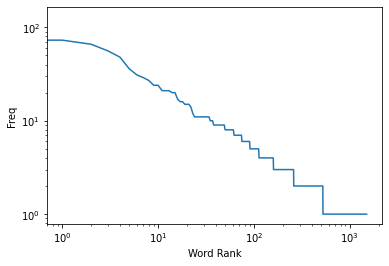

In [37]:
plt.loglog(word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")

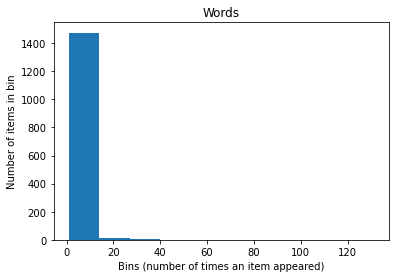

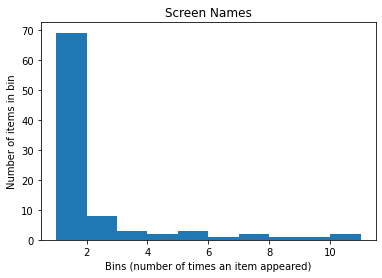

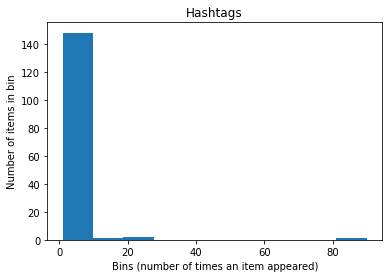

<Figure size 432x288 with 0 Axes>

In [38]:
for label, data in (('Words', words), 
                    ('Screen Names', screen_names), 
                    ('Hashtags', hashtags)):

    # Build a frequency map for each set of data
    # and plot the values
    c = Counter(data)
    plt.hist(list(c.values()))
    
    plt.title(label)
    plt.ylabel("Number of items in bin")
    plt.xlabel("Bins (number of times an item appeared)")
    
    plt.figure()

Text(0, 0.5, 'Number of tweets in bin')

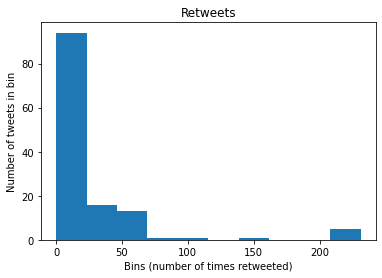

In [39]:
# Using underscores while unpacking values in
# a tuple is idiomatic for discarding them
counts = [count for count, _, _ in retweets]

plt.hist(counts)
plt.title("Retweets")
plt.xlabel('Bins (number of times retweeted)')
plt.ylabel('Number of tweets in bin')

In [40]:
print(counts)

[11, 3, 1, 231, 4, 59, 9, 1, 46, 5, 18, 5, 55, 0, 58, 2, 5, 8, 55, 9, 5, 12, 3, 39, 4, 1, 57, 12, 59, 8, 1, 14, 11, 11, 2, 231, 9, 2, 2, 46, 12, 62, 46, 6, 1, 46, 55, 7, 12, 6, 8, 21, 11, 5, 57, 5, 14, 21, 30, 2, 8, 27, 15, 9, 1, 1, 1, 1, 1, 1, 38, 34, 12, 58, 4, 7, 4, 6, 34, 19, 88, 8, 4, 8, 7, 231, 8, 8, 8, 3, 18, 45, 14, 30, 38, 12, 3, 18, 1, 231, 16, 20, 2, 12, 6, 48, 153, 6, 12, 38, 12, 3, 7, 231, 3, 1, 9, 109, 3, 38, 12, 21, 21, 27, 58, 59, 3, 1, 1, 2, 12]
